## Clasificación de imágenes

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras.optimizers import Adam


In [2]:
labels = os.listdir("PokemonData")
num = len(labels)
print(labels)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [3]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            
#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [4]:
X, y = input_target_split("PokemonData", labels)

Completed: Zubatstuffdslash

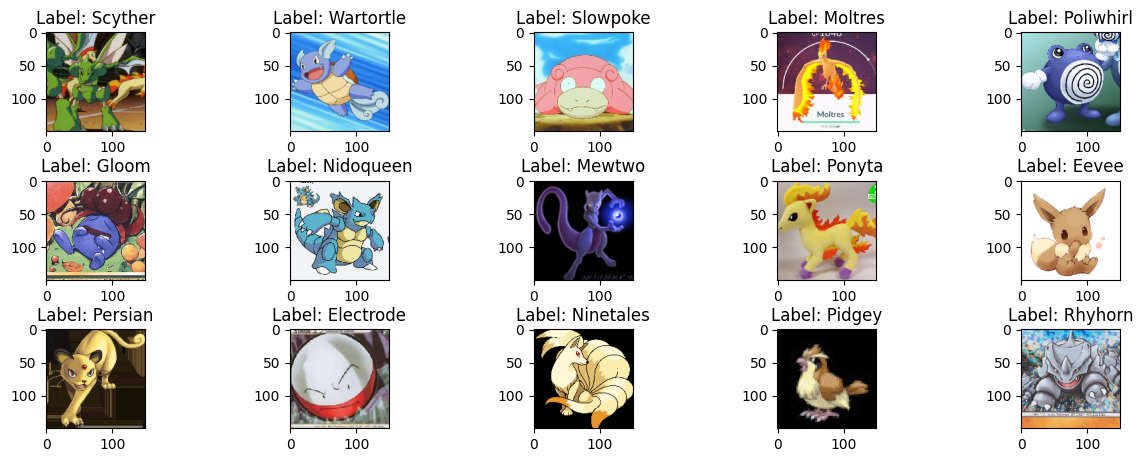

In [5]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [6]:
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([27, 25, 21, 31, 28, 31, 40, 24, 35, 32, 32, 26, 27, 34, 27, 39, 30,
       29, 38, 33, 25, 38, 30, 32, 26, 25, 28, 37, 19, 31, 42, 29, 31, 32,
       36, 31

In [8]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [9]:
y_train = np.eye(num)[y_train]
y_test = np.eye(num)[y_test]

In [10]:
img_size = 150
base_model = DenseNet201(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))

for layer in base_model.layers[:675]:
    layer.trainable = False

for layer in base_model.layers[675:]:
    layer.trainable = True

In [11]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(150, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=["accuracy"])

In [12]:
filepath= "model_pokemon.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

callbacks_list = [
        early_stopping,
        learning_rate_reduction
    ]

In [13]:
hist = model.fit(datagen.flow(X_train,y_train,batch_size=32),
                                        validation_data=testgen.flow(X_test,y_test,batch_size=32),
                                        epochs=10,
                                        callbacks=callbacks_list)

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 909s 5s/step - accuracy: 0.1976 - loss: 4.2430 - val_accuracy: 0.6811 - val_loss: 1.1961 - learning_rate: 0.0010
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 713s 4s/step - accuracy: 0.7565 - loss: 1.1911 - val_accuracy: 0.8036 - val_loss: 0.7516 - learning_rate: 0.0010
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 746s 4s/step - accuracy: 0.8457 - loss: 0.6924 - val_accuracy: 0.8356 - val_loss: 0.6046 - learning_rate: 0.0010
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 749s 4s/step - accuracy: 0.9064 - loss: 0.4413 - val_accuracy: 0.8342 - val_loss: 0.6008 - learning_rate: 0.0010
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 765s 5s/step - accuracy: 0.9234 - loss: 0.3242 - val_accuracy: 0.8475 - val_loss: 0.5547 - learning_rate: 0.0010
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 758s 4s/step - accuracy: 0.9404 - loss: 0.2512 - val_accuracy: 0.8375 - val_loss: 0.5265 - learning_rate: 0.0010
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 768s 5s/step - accuracy: 0.9483 - loss: 0.

In [14]:
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step
[ 15  41 111 ...  14  37 109]


In [15]:
ground = np.argmax(y_test,axis=1)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels))

                  precision    recall  f1-score   support

            Abra       0.75      0.75      0.75         8
      Aerodactyl       0.80      0.80      0.80        10
        Alakazam       0.00      0.00      0.00         5
Alolan Sandslash       0.83      1.00      0.91        10
           Arbok       1.00      1.00      1.00        13
        Arcanine       0.50      0.50      0.50        10
        Articuno       0.75      0.60      0.67         5
        Beedrill       1.00      0.80      0.89        10
      Bellsprout       1.00      1.00      1.00         5
       Blastoise       0.90      0.90      0.90        10
       Bulbasaur       0.82      1.00      0.90         9
      Butterfree       1.00      1.00      1.00         1
        Caterpie       1.00      1.00      1.00        10
         Chansey       1.00      0.89      0.94         9
       Charizard       0.70      0.88      0.78         8
      Charmander       0.85      0.92      0.88        12
      Charmel

In [17]:
y_pred

array([[1.47802091e-08, 5.57310909e-09, 2.18099670e-12, ...,
        4.94899723e-06, 1.07128501e-10, 8.03961608e-09],
       [4.96027698e-11, 3.46322008e-06, 2.23014732e-10, ...,
        3.00178132e-10, 8.73633499e-10, 7.44961872e-05],
       [5.39625908e-05, 1.83916526e-09, 1.13832549e-07, ...,
        1.09659986e-07, 7.15626802e-09, 6.91642854e-11],
       ...,
       [1.53939589e-04, 9.24330550e-07, 5.40774181e-07, ...,
        4.26073757e-06, 3.88058830e-08, 4.84044904e-06],
       [2.56119324e-06, 4.31201607e-02, 6.54994801e-06, ...,
        4.84689463e-06, 2.23375682e-08, 2.66176357e-05],
       [1.46600367e-08, 1.80234461e-09, 1.75018652e-10, ...,
        3.17655080e-09, 1.80216828e-10, 9.77643383e-11]], dtype=float32)

In [18]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([ 15,  41, 111, ...,  14,  37, 109], dtype=int64)

In [19]:
y_true = np.argmax(y_test,axis=1)
y_true

array([ 15,  41, 111, ..., 132,  88, 109], dtype=int64)

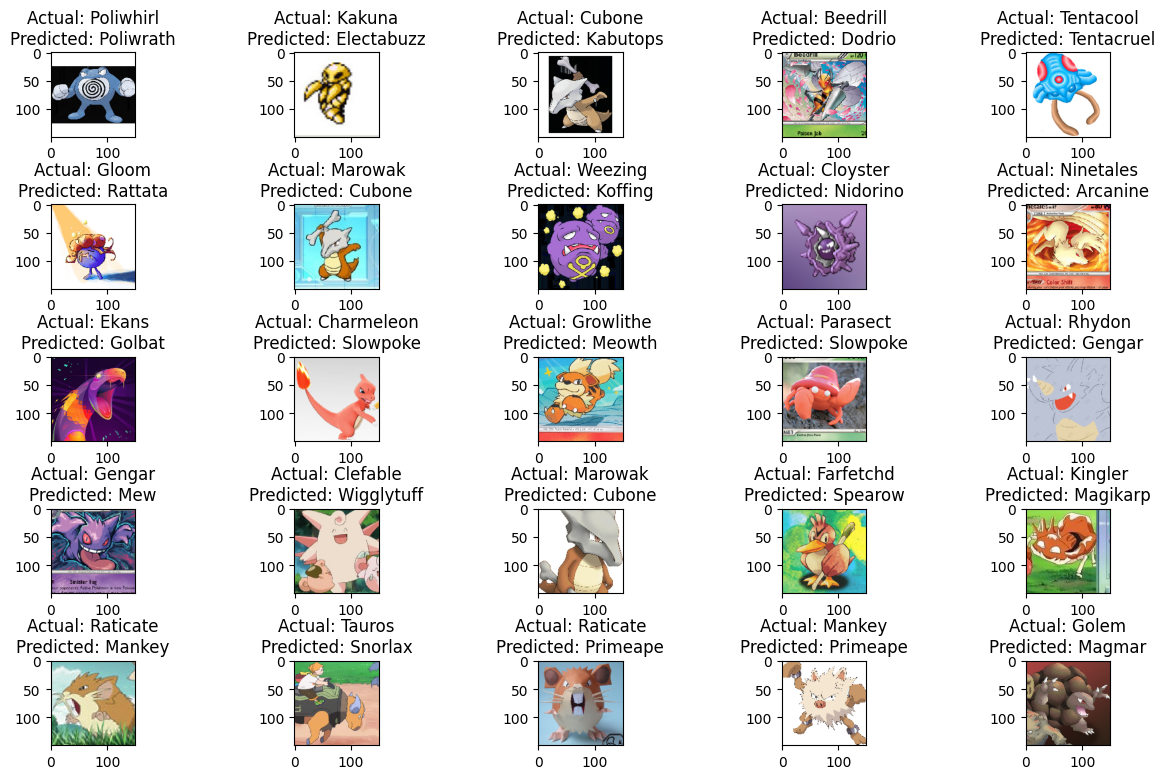

In [20]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')